# Plot the results

Make the figures I need in my thesis. Almost all data are gathered via testing model performance.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 600 model performance

In [2]:
p600 = pd.read_excel('../data/600time.xlsx')

In [3]:
line = [p600['train'].rename('训练'), p600['val'].rename('测试')]

sns.scatterplot is used to plot, scatter can show the exact every sample's result.
sns.lineplot is used to show the trend of change in training.

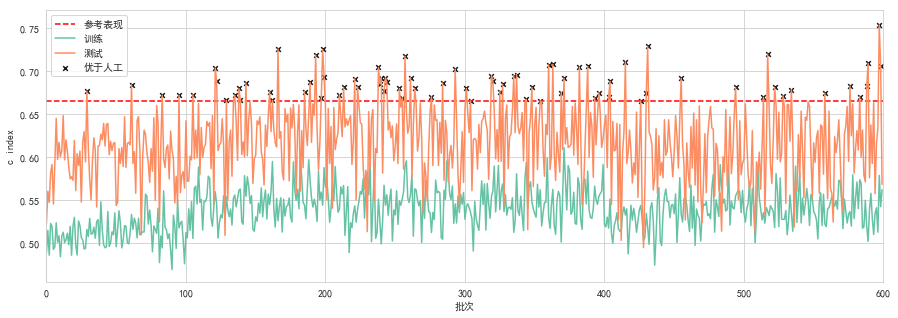

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('批次')
plt.xlim(0, 600)
ax.axhline(0.665, 0, 600,linestyle='--', color='r', label='参考表现')
plt.ylabel('c index')
sns.lineplot(data=line, palette="Set2", dashes=False)
ax.scatter(x = p600['val'].loc[p600['val']>0.665] .index.tolist(),
y = p600.loc[p600['val']>0.665, 'val'].values, marker='x', 
           c='k', alpha=0.9, s=22, label='优于人工')
plt.legend()
plt.savefig('perf.png', dpi=300, bbox_inches='tight')

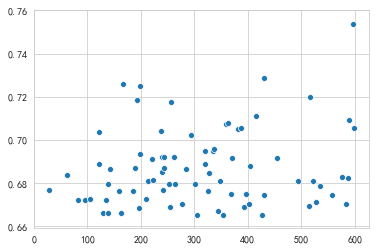

In [27]:
ax.scatter(x = p600['val'].loc[p600['val']>0.665] .index.tolist(),
y = p600['val'].values, marker='x', c='k', alpha=0.9, s=22, label='优于人工')

## The differences caused by the size of SNAS

In [2]:
d_raw =  pd.read_excel('../data/512_400time.xlsx')

In [3]:
d256 = pd.read_excel('../data/256_400time.xlsx')

In [4]:
d512 = d_raw.loc[d_raw['time']<='2019-03-31 16:14:33']

In [5]:
merge  = d512.append(d256, sort=False)

In [6]:
merge_re = merge.append(merge)

In [7]:
cidx = pd.Series(merge['train'].append(merge['val']), name='c index')

In [8]:
merge_re['c index'] = cidx
merge_re['类型'] = '训练'
merge_re['类型'][800:] = '测试'

D:\Miniconda3\envs\sci\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
merge_re.rename({'size':'大小'}, axis=1, inplace=True)

In [5]:
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']

sns.set_style("whitegrid",{"font.sans-serif":['simhei', 'Arial']})

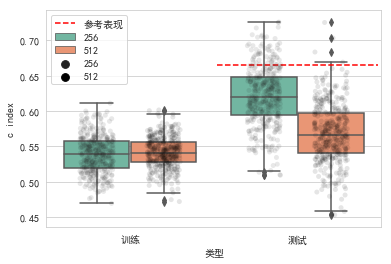

In [77]:
fig, ax = plt.subplots()
sns.boxplot(x="类型", y="c index", hue='大小', data=merge_re, palette="Set2")
sns.stripplot(x="类型", y="c index", hue='大小', data=merge_re, 
              dodge=True, alpha=0.1,jitter=0.2,color='k')
ax.axhline(0.665, 0.51, 0.99,linestyle='--', color='r', label='参考表现')
plt.legend(loc='upper left')
plt.savefig('ssci_para.png', dpi=300, bbox_inches='tight')

In [30]:
train256 = d256.train
train512 = d512.train
val256 = d256.val
val512 = d512.val
print('train', stats.ttest_ind(train256, train512))
print('val', stats.ttest_ind(val256, val512))
print('overt', stats.ttest_ind(train256, val256))
print('overv', stats.ttest_ind(train512, val512))

train Ttest_indResult(statistic=-1.6070253235788186, pvalue=0.1084443901041859)
val Ttest_indResult(statistic=18.18859925314561, pvalue=4.141212854753419e-62)
overt Ttest_indResult(statistic=-33.88414106399428, pvalue=1.213824744336951e-156)
overv Ttest_indResult(statistic=-11.554647340797029, pvalue=1.1556037181553833e-28)


## The influence of hyperparameters

In [ ]:
train = merge_re.loc[merge_re['类型'] == '训练', 'c index']
val = merge_re.loc[merge_re['类型'] == '测试', 'c index']
stats.ttest_ind(merge_re.loc[(merge_re['类型'] == '训练')])

In [7]:
data = pd.read_excel('../data/performance_p1.xlsx')

In [32]:
large = data.loc[(data['size']==512)&(data.num!=380)]
middle =  data.loc[(data['size']==256)&(data.num!=380)]
print('largev', stats.ttest_ind(large.loc[large.aug==False, 'val'], large.loc[large.aug==True, 'val']))
print('midv', stats.ttest_ind(middle.loc[middle.aug==False, 'val'], middle.loc[middle.aug==True, 'val']))
print('larget', stats.ttest_ind(large.loc[large.aug==False, 'train'], large.loc[large.aug==True, 'train']))
print('midt', stats.ttest_ind(middle.loc[middle.aug==False, 'train'], middle.loc[middle.aug==True, 'train']))

largev Ttest_indResult(statistic=6.3942487064607905, pvalue=1.0914268992862451e-08)
midv Ttest_indResult(statistic=12.610018604171735, pvalue=1.6373901351289064e-20)
larget Ttest_indResult(statistic=15.27845351016328, pvalue=3.6802434462573413e-25)
midt Ttest_indResult(statistic=2.607293833605387, pvalue=0.010930688122953733)


In [46]:
data['Model Size'] = np.where(data['size'] == 256, 'Normal', 'Large')
english_plot = data.rename({'aug':'data augmentation', 'num':'data number',
                            'val':'c index in test', 'train':'c index in train'}, axis=1)

In [8]:
data['模型大小'] = np.where(data['size'] == 256, '正常',  '增大')

In [9]:
chinese_plot = data.rename({'aug':'是否数据增强', 'num':'数据量',
                            'val':'测试集c index', 'train':'训练集c index'}, axis=1)

In [11]:
# chinese_plot = pd.read_excel('../data/附表4.xlsx')

In [10]:
refer = {False:'否',True:'是'}
chinese_plot['是否数据增强'] = chinese_plot['是否数据增强'].map(refer)

In [56]:
chinese_plot_re = chinese_plot.append(chinese_plot)
chinese_plot_re['c index'] = data.train.append(data.val)
chinese_plot_re['类型'] = '测试'
chinese_plot_re['类型'][:len(chinese_plot)] = '训练'

D:\Miniconda3\envs\sci\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

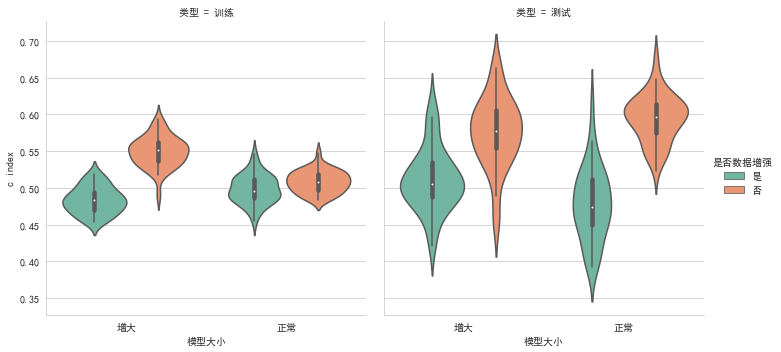

In [71]:
plt.figure()
sns.catplot(x="模型大小", y="c index",
hue="是否数据增强", col="类型",
data=chinese_plot_re.loc[chinese_plot_re['数据量']!=380], kind="violin", palette="Set2")
# plt.savefig('ss_para.png', dpi=300, bbox_inches='tight')

## The affect of the population of training data

In [6]:
np.unique(d_raw['num'])

array([380, 455, 531, 607], dtype=int64)

In [12]:
d_compp1 = pd.read_excel('../data/performance_p1.xlsx')
d_compp1 = d_compp1.loc[(d_compp1.aug==False)&(d_compp1['size']==256)]

In [13]:
d_compp11 = d_compp1.loc[(d_compp1.num==380)|(d_compp1.num==607)]

In [14]:
d_compp12 = d_raw.loc[(d_raw['num']==455)|(d_raw['num']==531)]

In [15]:
d_comp = d_compp11.append(d_compp12, sort=False)

In [16]:
# d_comp = pd.read_excel('../data/附表7.xlsx')

In [20]:
d_comp_re = d_comp.append(d_comp)
d_comp_re['c index'] = d_comp.train.append(d_comp.val)
d_comp_re['类型'] = '训练'
d_comp_re['类型'][len(d_comp):] = '测试'
d_comp_re.rename({'num':'训练集大小'}, axis =1, inplace=True)

D:\Miniconda3\envs\sci\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


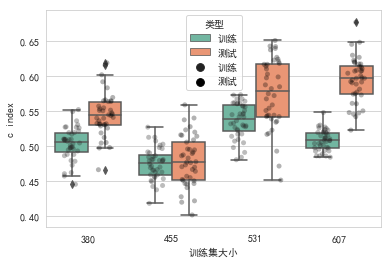

In [21]:
plt.figure()
sns.boxplot(x="训练集大小", y="c index", hue='类型', data=d_comp_re, palette="Set2")
sns.stripplot(x="训练集大小", y="c index", hue='类型', data=d_comp_re, dodge=True, alpha=0.3,jitter=0.2,color='k')
# plt.savefig('num.png', dpi=300, bbox_tight=True)

In [13]:
nums = np.unique(d_comp.num)
for t in ('val', 'train'):
    start = 0
    g = d_comp.loc[d_comp.num==607, t]
    g0 = d_comp.loc[d_comp.num==nums[start], t]
    while start < len(nums)-1:
        print(f'607 compare {nums[start]} {t} {stats.ttest_ind(g, g0)}')
        start += 1
        g1 = d_comp.loc[d_comp.num==nums[start], t]
        print(f'{nums[start]} compare {nums[start-1]} {t} {stats.ttest_ind(g1, g0)}')
        g0 = g1

607 compare 380 val Ttest_indResult(statistic=7.062214116767689, pvalue=5.996521341365052e-10)
455 compare 380 val Ttest_indResult(statistic=-8.72128562519049, pvalue=3.7502146571374197e-13)
607 compare 455 val Ttest_indResult(statistic=15.168386374518928, pvalue=5.62195194960202e-25)
531 compare 455 val Ttest_indResult(statistic=9.899276565535763, pvalue=1.970328808794774e-15)
607 compare 531 val Ttest_indResult(statistic=2.1151703520864427, pvalue=0.037607779898241184)
607 compare 531 val Ttest_indResult(statistic=2.1151703520864427, pvalue=0.037607779898241184)
607 compare 380 train Ttest_indResult(statistic=1.250702690446955, pvalue=0.21478176956067993)
455 compare 380 train Ttest_indResult(statistic=-5.473030694744443, pvalue=5.18920151570683e-07)
607 compare 455 train Ttest_indResult(statistic=7.940521352897828, pvalue=1.2268015581861634e-11)
531 compare 455 train Ttest_indResult(statistic=11.523643552905426, pvalue=1.63266001832359e-18)
607 compare 531 train Ttest_indResult(stat

## The outcome of SNAS with gene infomation

In [17]:
gene = d_raw.loc[d_raw.time>='2019-04-02 19:49:01']

In [18]:
comp = d_compp1.loc[d_compp1.num==607]

In [19]:
gecomp = gene.append(comp, sort=False)

In [20]:
gecomp['使用基因组信息'] = '是'
gecomp['使用基因组信息'][40:] = '否'

D:\Miniconda3\envs\sci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# gecomp = pd.read_excel('../data/附表8.xlsx')

In [29]:
gecomp_re = gecomp.append(gecomp)
gecomp_re['c index'] = gecomp.train.append(gecomp.val)
gecomp_re['类型'] = '训练'
gecomp_re['类型'][len(gecomp):] = '测试'
gecomp_re.rename({'num':'训练集大小'}, axis =1, inplace=True)

D:\Miniconda3\envs\sci\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


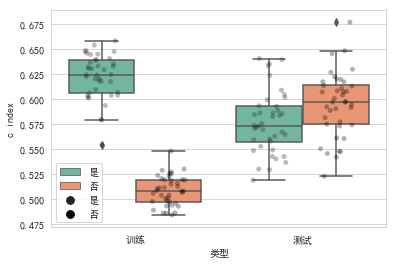

In [70]:
fig, ax = plt.subplots()
# ax.axhline(0.665, 0.51, 0.99,linestyle='--', color='r', label='参考表现')
sns.boxplot(x="类型", y="c index", hue='使用基因组信息', data=gecomp_re, palette="Set2")
# sns.swarmplot(x="类型", y="c index", hue='使用基因组信息', data=gecomp_re, dodge=True, size=4)
sns.stripplot(x="类型", y="c index", hue='使用基因组信息', data=gecomp_re, dodge=True, alpha=0.3,jitter=0.2,color='k')
plt.legend(loc='lower left')
plt.savefig('genes.png', dpi=300, bbox_tight=True)

In [38]:
print(f'gene compare nogene train {stats.ttest_ind(gene.train, comp.train)}')
print(f'gene compare nogene  val {stats.ttest_ind(gene.val, comp.val)}')

gene compare nogene train Ttest_indResult(statistic=26.957637568328938, pvalue=2.803645703334306e-41)
gene compare nogene  val Ttest_indResult(statistic=-2.608615992006099, pvalue=0.010891994144940213)
